<a href="https://colab.research.google.com/github/SuhelAnsari9272/Topic-Modeling-on-News-Articles-/blob/main/Suhel_Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import re
import nltk
from nltk.tokenize import RegexpTokenizer

import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
nltk.download('stopwords')
import spacy
import gensim
from wordcloud import WordCloud
import nltk 
nltk.download('wordnet')
from nltk.tokenize import word_tokenize

import nltk 
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
!pip install pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 11.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=d4bdc31939ae1529c87ad1dd5fb5ef09be6a851c07542dfacd3201fc2f3532d9
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=83da2b3cea7a1e1f9823e45a427c8faef8adae62d2c892b8f42fa6c73ba36c33
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [2]:
#mouting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/bbc"
folders=["business","entertainment","politics","sport","tech"] 

In [4]:
folder_list=os.listdir(path)
folder_list

['README.TXT', 'tech', 'sport', 'entertainment', 'business', 'politics']

In [5]:
#loading the data
News=[]
Type=[]

folder_data="/content/drive/MyDrive/bbc"
folders=["business","entertainment","politics","sport","tech"] 
for i in folders:
    files=os.listdir(path+'/'+i)
    for text_file in files:
        file_path=path + '/'+i+'/'+text_file
        with open(file_path,'rb') as f:
            data=f.read()
        News.append(data)
        Type.append(i)
      

In [6]:
data={'news':News,'type':Type}
df = pd.DataFrame(data)
df.to_csv('./bbc.csv')

In [7]:
df= pd.read_csv('bbc.csv')

In [8]:
df.head()

,Unnamed: 0,news,type
0,0,"b""Peugeot deal boosts Mitsubishi\n\nStruggling...",business
1,1,b'Call centre users \'lose patience\'\n\nCusto...,business
2,2,b'China keeps tight rein on credit\n\nChina\'s...,business
3,3,b'US trade gap hits record in 2004\n\nThe gap ...,business
4,4,b'India\'s rupee hits five-year high\n\nIndia\...,business


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2225 non-null   int64 
 1   news        2225 non-null   object
 2   type        2225 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


In [10]:
df.shape

(2225, 3)

In [11]:
#first observation 
df['news'][0]

'b"Peugeot deal boosts Mitsubishi\\n\\nStruggling Japanese car maker Mitsubishi Motors has struck a deal to supply French car maker Peugeot with 30,000 sports utility vehicles (SUV).\\n\\nThe two firms signed a Memorandum of Understanding, and say they expect to seal a final agreement by Spring 2005. The alliance comes as a badly-needed boost for loss-making Mitsubishi, after several profit warnings and poor sales. The SUVs will be built in Japan using Peugeot\'s diesel engines and sold mainly in the European market. Falling sales have left Mitsubishi Motors with underused capacity, and the production deal with Peugeot gives it a chance to utilise some of it.\\n\\nIn January, Mitsubishi Motors issued its third profits warning in nine months, and cut its sales forecasts for the year to March 2005. Its sales have slid 41% in the past year, catalysed by the revelation that the company had systematically been hiding records of faults and then secretly repairing vehicles. As a result, the J

In [12]:
#length of the news
df['length']=df.news.str.len()


In [13]:
df.head()

,Unnamed: 0,news,type,length
0,0,"b""Peugeot deal boosts Mitsubishi\n\nStruggling...",business,1846
1,1,b'Call centre users \'lose patience\'\n\nCusto...,business,3882
2,2,b'China keeps tight rein on credit\n\nChina\'s...,business,1404
3,3,b'US trade gap hits record in 2004\n\nThe gap ...,business,1984
4,4,b'India\'s rupee hits five-year high\n\nIndia\...,business,1023


In [14]:
#function to return number of words in news article
def word_count(article):
  return len(article.split(" "))

In [15]:
df['word_count']=df['news'].apply(word_count)

In [16]:
df.head()

,Unnamed: 0,news,type,length,word_count
0,0,"b""Peugeot deal boosts Mitsubishi\n\nStruggling...",business,1846,296
1,1,b'Call centre users \'lose patience\'\n\nCusto...,business,3882,653
2,2,b'China keeps tight rein on credit\n\nChina\'s...,business,1404,245
3,3,b'US trade gap hits record in 2004\n\nThe gap ...,business,1984,324
4,4,b'India\'s rupee hits five-year high\n\nIndia\...,business,1023,172


In [17]:
df.describe()

,Unnamed: 0,length,word_count
count,2225.000000,2225.000000,2225.000000
mean,1112.000000,2288.632809,379.394607
std,642.446496,1375.957963,235.104259
min,0.000000,512.000000,87.000000
25%,556.000000,1465.000000,243.000000
50%,1112.000000,1991.000000,327.000000
75%,1668.000000,2829.000000,465.000000
max,2224.000000,25670.000000,4377.000000


In [18]:
#Total number of words present in the whole corpus
Total_words=sum(df['word_count'])
Total_words

844153

In [19]:
#removing duplicates observations
df=df.drop_duplicates()

In [20]:
#Types of news in the data
df['type'].value_counts(normalize=True)*100

sport            22.966292
business         22.921348
politics         18.741573
tech             18.022472
entertainment    17.348315
Name: type, dtype: float64

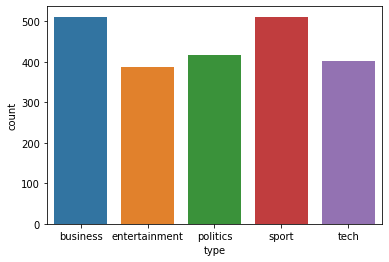

In [21]:
#Countplot of different types of Articles in the data
sns.countplot(df['type'])

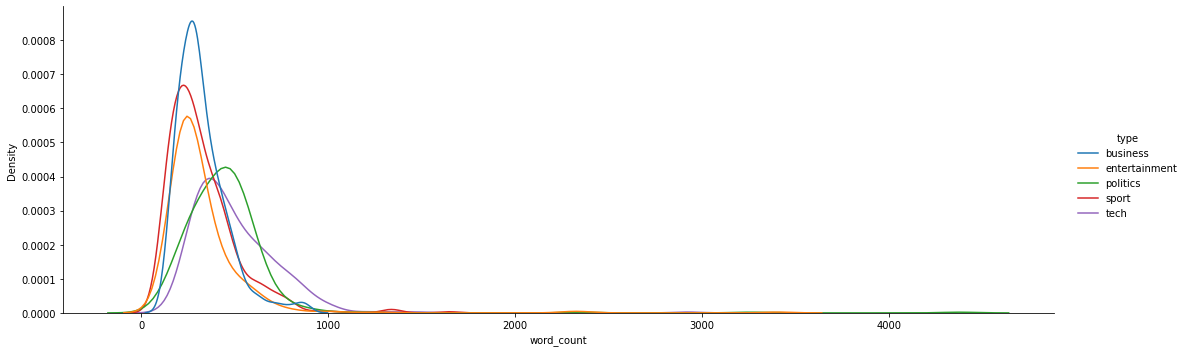

In [22]:
#distribution of length of different news type
sns.displot(df, x="word_count", hue="type", kind="kde",height=5,aspect =3 )

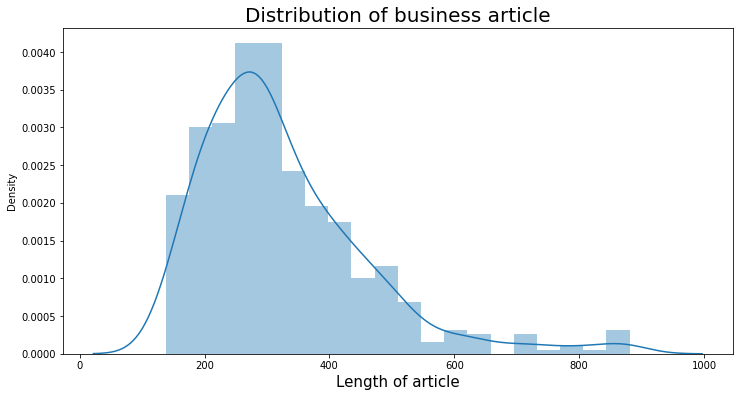

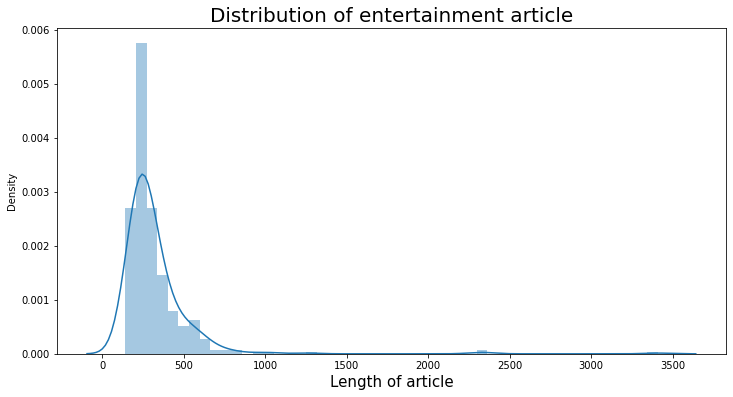

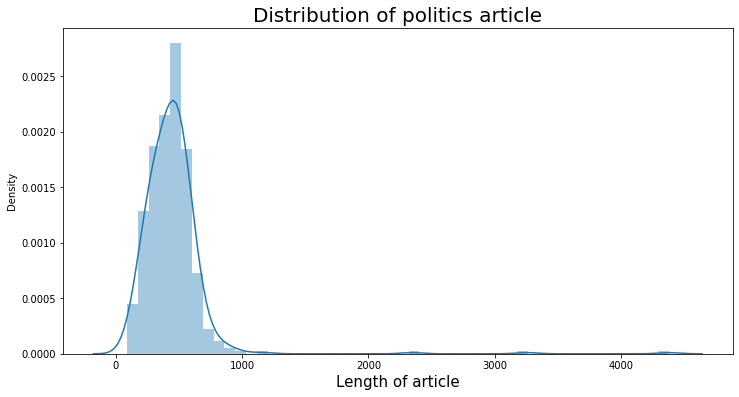

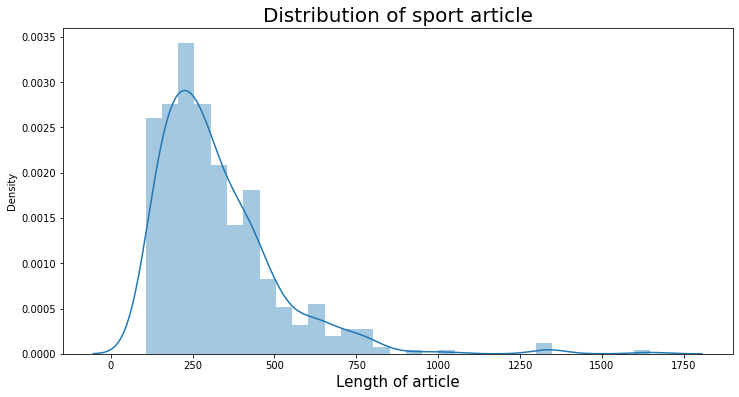

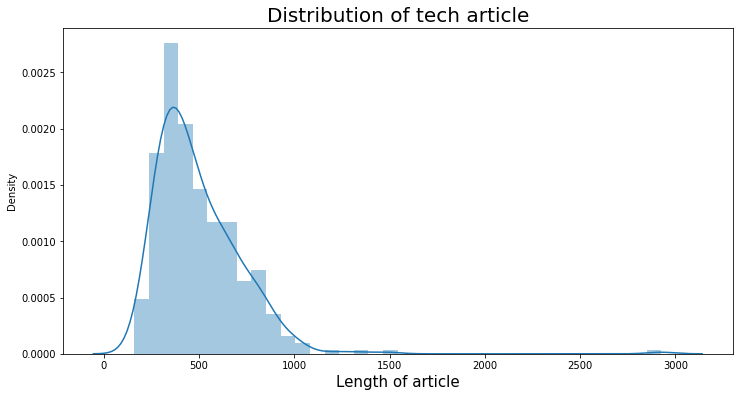

In [23]:
#Distribution of different types of articles
types_article=list(df['type'].unique())
for article in types_article:
  df_article=df[df['type']==article]
  plt.figure(figsize=(12,6))
  fig=sns.distplot(x=df_article['word_count'])
  fig.set_title(f'Distribution of {article} article',size=20)
  fig.set_xlabel('Length of article',size=15)

In [24]:
#copying the original data
corpus_df=df.copy(deep=True)

In [25]:
#any random observation
random_obs=df['news'][1786]
random_obs

'b\'Vickery upbeat about arm injury\\n\\nEngland prop Phil Vickery is staying positive despite a broken arm ruling him out of the RBS Six Nations.\\n\\nThe 28-year-old fractured the radius in his right forearm during Gloucester\\\'s 17-16 win over Bath on Saturday. He will undergo an operation on Monday and is expected to be out for at least six weeks. He said: "This isn\\\'t an injury that will stop me from working hard on the fitness elements and being around the lads." He added: "I\\\'ve got the operation this afternoon and I could be back doing fitness work after a week." "As frustrating as it is, I\\\'ve got to be positive."\\n\\nAfter the game, Vickery spoke with Bath prop David Barnes, who also broke his arm recently. "I had a chat with David Barnes and it looks like a similar injury to him," he said. "He said he had the operation and he was back running after a week. "There\\\'s no doubt that I\\\'m going to get involved and be around this place as soon as I can after the opera

* pucntuation, numericals , special characters, new line and additional spaces.

In [26]:
#Removal of newline character
random_obs=random_obs.replace('\\n'," ")

#Removal of all the punctuations,special character, numbers 
random_obs=re.sub("[^a-zA-Z]"," ",random_obs)

#conversion to lower case
random_obs=random_obs.lower()

#removal of additional whitespace
random_obs=re.sub(r'\s+'," ",random_obs)

#After basic cleaning
random_obs


'b vickery upbeat about arm injury england prop phil vickery is staying positive despite a broken arm ruling him out of the rbs six nations the year old fractured the radius in his right forearm during gloucester s win over bath on saturday he will undergo an operation on monday and is expected to be out for at least six weeks he said this isn t an injury that will stop me from working hard on the fitness elements and being around the lads he added i ve got the operation this afternoon and i could be back doing fitness work after a week as frustrating as it is i ve got to be positive after the game vickery spoke with bath prop david barnes who also broke his arm recently i had a chat with david barnes and it looks like a similar injury to him he said he said he had the operation and he was back running after a week there s no doubt that i m going to get involved and be around this place as soon as i can after the operation gloucester director of rugby nigel melville said phil has broke

A basic cleaning has been performed . Now Applying this one whole data

In [27]:
#Function to perform cleaning or preprocessing of articles
def cleaning(text):
  cleaned_text = text.replace('\\n'," ")    # removal of new line symbol \n 
  
  cleaned_text = re.sub("[^a-zA-Z]"," ",cleaned_text)                 # removal of all the punctuations,special character, numbers
  
  cleaned_text = cleaned_text.lower()                                 # converting to lower case 
  
  cleaned_text = re.sub(r'\s+'," ",cleaned_text)                      # Removal of additional white space
  
  return cleaned_text

In [28]:
#Applying basic cleaning to whole data
corpus_df['news']=corpus_df['news'].apply(cleaning)

In [29]:
#Word Count after basic cleaning
corpus_df['wc_after_cleaning']=corpus_df['news'].apply(word_count)

In [30]:
corpus_df.head()

,Unnamed: 0,news,type,length,word_count,wc_after_cleaning
0,0,b peugeot deal boosts mitsubishi struggling ja...,business,1846,296,301
1,1,b call centre users lose patience customers tr...,business,3882,653,643
2,2,b china keeps tight rein on credit china s eff...,business,1404,245,241
3,3,b us trade gap hits record in the gap between ...,business,1984,324,326
4,4,b india s rupee hits five year high india s ru...,business,1023,172,183


* Visulization of data - unigram / bigram  top 10

In [32]:
#Lemmatization 
import nltk 
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
def lemmatize_word(text):
    word_list = word_tokenize(text)
    lemma = WordNetLemmatizer()
    word_list = [lemma.lemmatize(word) for word in word_list]
    # list to sentence
    return ' '.join(word_list)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [33]:
#Applying lemmatization
corpus_df['news']=corpus_df['news'].apply(lemmatize_word)

In [125]:
type(corpus_df['news'])

pandas.core.series.Series

In [139]:
#Top 20 most frequent words in the corpus
Top_20_freq = pd.Series(' '.join(corpus_df['news']).split()).value_counts()[:20]
top20=pd.DataFrame()
top20['Words']= list(Top_20_freq.index)
top20['Counts']=list(Top_20_freq.values)

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x = 'Words',y = 'Counts',data = top20,ax=ax)

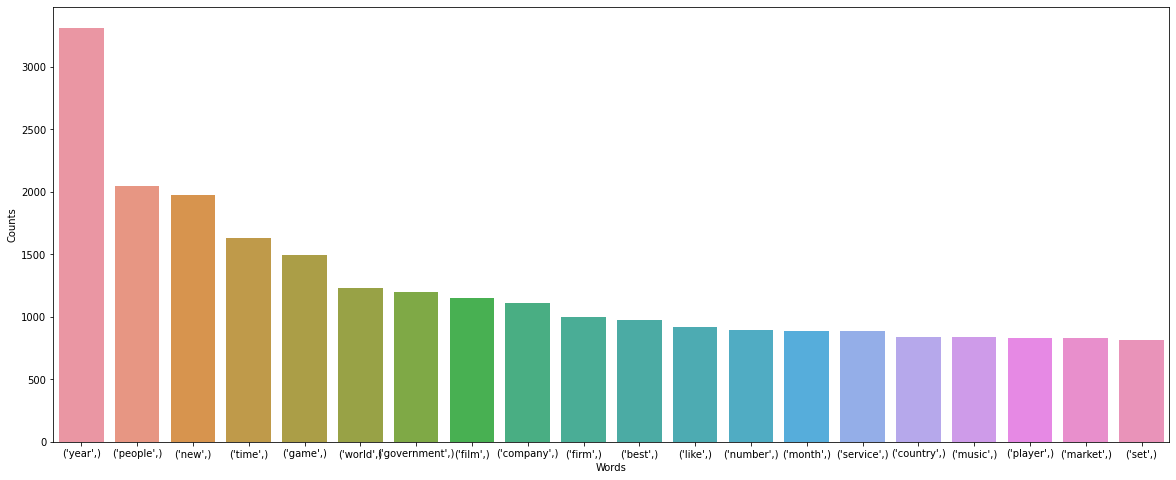

In [35]:
#Removing short length words ( length less than 3)
def short_length(text):
  return (' '.join([wds for wds in text.split() if len(wds)>2]))

corpus_df['news']=corpus_df['news'].apply(short_length)


In [36]:
corpus_df.head()

,Unnamed: 0,news,type,length,word_count,wc_after_cleaning
0,0,peugeot deal boost mitsubishi struggling japan...,business,1846,296,301
1,1,call centre user lose patience customer trying...,business,3882,653,643
2,2,china keep tight rein credit china effort stop...,business,1404,245,241
3,3,trade gap hit record the gap between export an...,business,1984,324,326
4,4,india rupee hit five year high india rupee hit...,business,1023,172,183


In [37]:
corpus_df['wc_rem_short_len']=corpus_df['news'].apply(word_count)

In [38]:
corpus_df.head()

,Unnamed: 0,news,type,length,word_count,wc_after_cleaning,wc_rem_short_len
0,0,peugeot deal boost mitsubishi struggling japan...,business,1846,296,301,228
1,1,call centre user lose patience customer trying...,business,3882,653,643,516
2,2,china keep tight rein credit china effort stop...,business,1404,245,241,180
3,3,trade gap hit record the gap between export an...,business,1984,324,326,241
4,4,india rupee hit five year high india rupee hit...,business,1023,172,183,130


In [41]:
#Stopwords
# list of stopwords from nltk
stopwords_nltk = list(stopwords.words('english'))

# list of stopwords from spacy
sp = spacy.load('en_core_web_sm')
stopwords_spacy = list(sp.Defaults.stop_words)

# list of stopwords from gensim
stopwords_gensim = list(gensim.parsing.preprocessing.STOPWORDS)

# unique stopwords from all stopwords
all_stopwords = []
all_stopwords.extend(stopwords_nltk)
all_stopwords.extend(stopwords_spacy)
all_stopwords.extend(stopwords_gensim)

# all unique stop words
all_stopwords = list(set(all_stopwords))

def stop_words(text):
  text = [wd.lower() for wd in text.split() if wd.lower() not in all_stopwords]
  return " ".join(text)

In [42]:
len(all_stopwords)

413

In [43]:
#Removal of Stopwords
corpus_df['news']=corpus_df['news'].apply(stop_words)

In [44]:
corpus_df['after_stop']=corpus_df['news'].apply(word_count)

In [45]:
corpus_df.head()

,Unnamed: 0,news,type,length,word_count,wc_after_cleaning,wc_rem_short_len,after_stop
0,0,peugeot deal boost mitsubishi struggling japan...,business,1846,296,301,228,163
1,1,centre user lose patience customer trying cent...,business,3882,653,643,516,288
2,2,china tight rein credit china effort stop econ...,business,1404,245,241,180,119
3,3,trade gap hit record gap export import hit tim...,business,1984,324,326,241,157
4,4,india rupee hit year high india rupee hit year...,business,1023,172,183,130,84


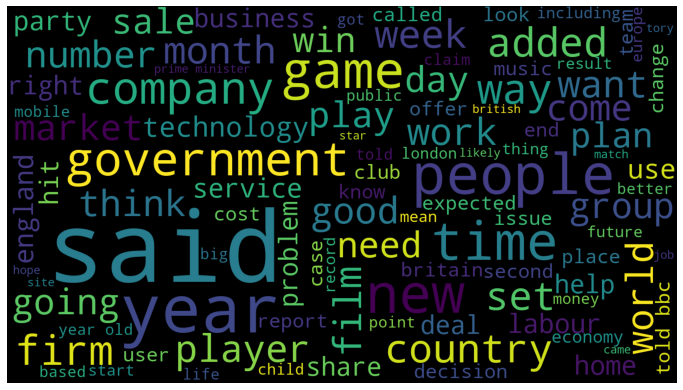

In [48]:
# Cloud Words plot for displaying most frequent words in the data 
freq_words = ','.join(list(corpus_df['news'].values))

wordcloud = WordCloud(width=1366, height=768, random_state=21,max_words=100 ,max_font_size=200,background_color='black').generate(freq_words)
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [49]:
#removal of non-contextual words
add_stopwords= ['said','told','called','use','know','came','based','way','added','including','got']

In [50]:
def remove_add_stopwords(text):
  text = [wd.lower() for wd in text.split() if wd.lower() not in add_stopwords]
  return " ".join(text)


In [51]:
#Removing addtional stopwords according to use case
corpus_df['news']=corpus_df['news'].apply(remove_add_stopwords)

In [52]:
corpus_df['wc_rem_stopword']=corpus_df['news'].apply(word_count)

In [53]:
corpus_df.head()

,Unnamed: 0,news,type,length,word_count,wc_after_cleaning,wc_rem_short_len,after_stop,wc_rem_stopword
0,0,peugeot deal boost mitsubishi struggling japan...,business,1846,296,301,228,163,162
1,1,centre user lose patience customer trying cent...,business,3882,653,643,516,288,285
2,2,china tight rein credit china effort stop econ...,business,1404,245,241,180,119,119
3,3,trade gap hit record gap export import hit tim...,business,1984,324,326,241,157,155
4,4,india rupee hit year high india rupee hit year...,business,1023,172,183,130,84,82


In [54]:
Top_20_freq = pd.Series(' '.join(corpus_df['news']).split()).value_counts()[:20]
Top_20_freq

year          3313
people        2046
new           1978
time          1627
game          1493
world         1229
government    1196
film          1148
company       1114
firm          1002
best           978
like           920
number         893
month          885
service        884
country        840
music          839
player         833
market         828
set            813
dtype: int64

In [55]:
#Data reduction 
after_preprocess=corpus_df['wc_rem_stopword'].sum()
after_preprocess

data_reduce=(after_preprocess/Total_words)*100
data_reduce

48.56643286228918

* Almost 50% of unneccessary data has been removed.

In [56]:
#plot for top 20 words in the data from alma
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

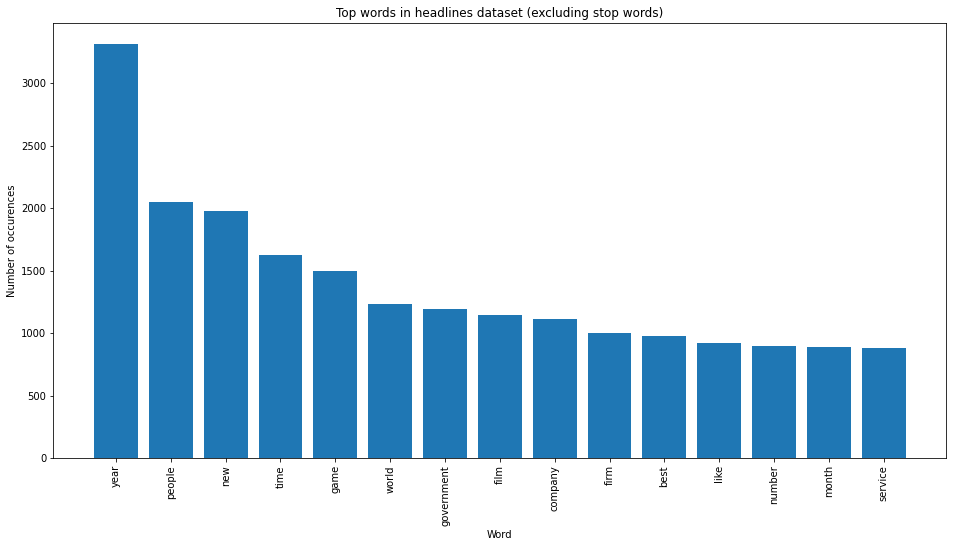

In [57]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=corpus_df['news'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [58]:
#Tf-Idf vectoriser
vectorizer = TfidfVectorizer(min_df = 0.03)
document_term_matrix = vectorizer.fit_transform(corpus_df['news'])

In [59]:
document_term_matrix.shape

(2225, 962)

* LDA

In [60]:
#Almabetter
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda_model = GridSearchCV(LatentDirichletAllocation(),param_grid=grid_params)
lda_model.fit(document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -25488.57814600824
LDA model Perplexity on train data 1501.0231650632647


In [61]:
#saoumayajit
# LDA model
lda= LatentDirichletAllocation(n_components=5, random_state=0, n_jobs=-1)
lda.fit(document_term_matrix)

LatentDirichletAllocation(n_components=5, n_jobs=-1, random_state=0)

In [62]:

# LDA model
top_lda=lda.fit_transform(document_term_matrix)

print(top_lda.shape)
print(top_lda)

(2225, 5)
[[0.02747001 0.88904621 0.02755477 0.02796841 0.0279606 ]
 [0.02657831 0.89331095 0.02617498 0.02674465 0.0271911 ]
 [0.02872701 0.88505907 0.02858707 0.02883612 0.02879073]
 ...
 [0.03316162 0.8671819  0.03282233 0.03356001 0.03327414]
 [0.55723909 0.35567004 0.0288167  0.02925733 0.02901684]
 [0.02888572 0.75923198 0.02909574 0.15361369 0.02917288]]


In [63]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(top_lda[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  2.747001092238597 %
Topic  1 :  88.90462077027107 %
Topic  2 :  2.755477461787126 %
Topic  3 :  2.796841002792562 %
Topic  4 :  2.7960596729106535 %


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis.sklearn


In [ ]:
lda_panel1 = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix,vectorizer,mds='tsne')
lda_panel1

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  27.387379
2       51.163364 -159.968018       2        1  22.024131
1      -73.144554   21.523815       3        1  20.785339
0      -66.410133 -110.606438       4        1  18.580977
4       54.417324   12.443444       5        1  11.222174, topic_info=           Term       Freq      Total Category  logprob  loglift
335        film  65.000000  65.000000  Default  30.0000  30.0000
472      labour  41.000000  41.000000  Default  29.0000  29.0000
280    election  40.000000  40.000000  Default  28.0000  28.0000
625       party  41.000000  41.000000  Default  27.0000  27.0000
362        game  66.000000  66.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
559    minister  11.059928  35.089902   Topic5  -4.9609   1.0327
382  government  13.032408  47.921600   Topic5  -4.7968   0.8852
629      people  13.056604  63.173060   Topic5  -4.7949   0.6107
571       music   9.901912  38.746660   Topic5  -5.0715   0.8230
589      number   8.238328  39.300836   Topic5  -5.2554   0.6248

[251 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
9         3  0.985406      actor
10        3  0.918026    actress
24        1  0.819707  agreement
24        2  0.091079  agreement
24        3  0.091079  agreement
...     ...       ...        ...
959       1  0.352742       year
959       2  0.250333       year
959       3  0.227576       year
959       4  0.113788       year
959       5  0.056894       year

[613 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1, 5])

In [64]:
# most important words for each topic
vocab = vectorizer.get_feature_names()

In [66]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=800, height=500).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

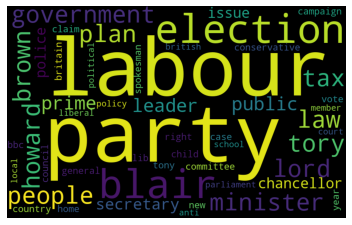

In [67]:
#Word Cloud for each topic
draw_word_cloud(0)

* Politics

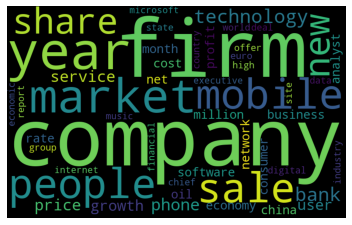

In [68]:
draw_word_cloud(1)

* Business

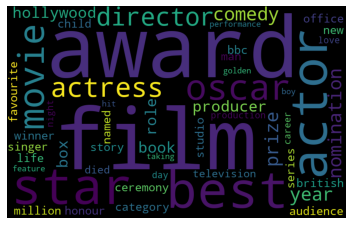

In [69]:
draw_word_cloud(2)

* Entertainment

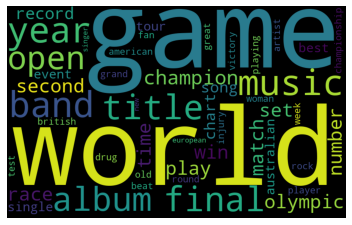

In [70]:
draw_word_cloud(3)

* Technology

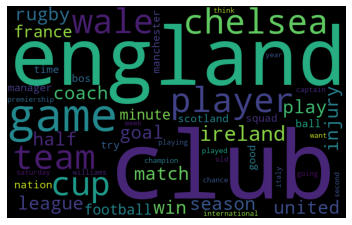

In [71]:
draw_word_cloud(4)

* Sports

In [73]:
import pyLDAvis.sklearn


* LSA

In [104]:
# create svd instance
svd_model = TruncatedSVD(n_components=5,random_state=0,algorithm='randomized')

# fit model to data
svd_model.fit(document_term_matrix)

tsvd_mat=svd_model.transform(document_term_matrix)

In [105]:
tsvd_mat.shape

(2225, 5)

In [106]:
tsne = TSNE(n_components=2)
tsne_mat = tsne.fit_transform(tsvd_mat)

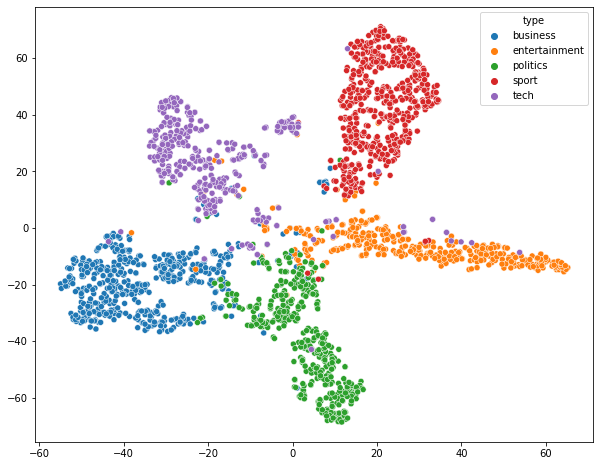

In [107]:
plt.figure(figsize=(10,8))
sns.scatterplot(tsne_mat[:,0],tsne_mat[:,1],hue=corpus_df['type'])

In [108]:
#Draw word cloud for each topic
# Generate a word cloud image for given topic
def word_cloud_lsa(index):
  imp_words_topic=""
  comp=svd_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=800, height=500).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

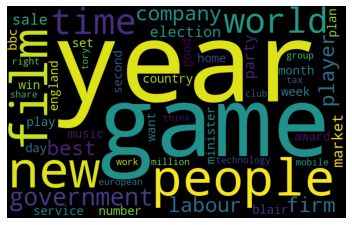

In [109]:
#Word Cloud for each topic using LSA
word_cloud_lsa(0)

* Business ; Which is not as clear

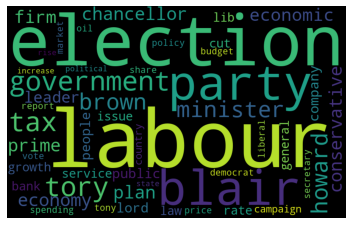

In [110]:
word_cloud_lsa(1)

* Politics

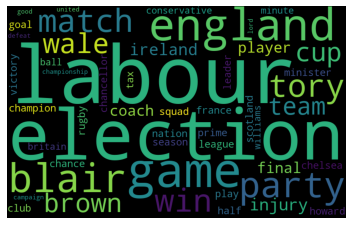

In [111]:
word_cloud_lsa(2)

* Sports

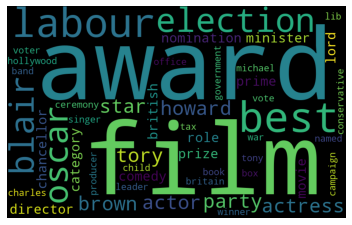

In [112]:
word_cloud_lsa(3)

* Entertainment ; but not clear

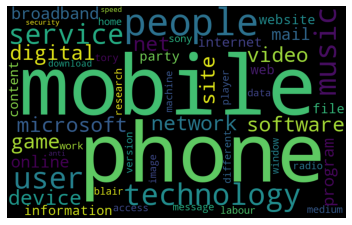

In [113]:
word_cloud_lsa(4)

* technology

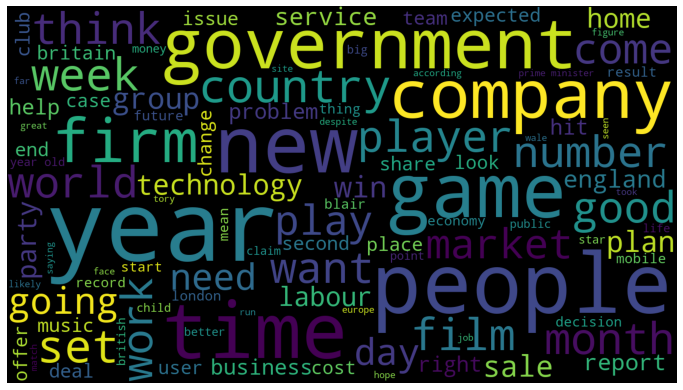

In [114]:
freq_words = ','.join(list(corpus_df['news'].values))

wordcloud = WordCloud(width=1366, height=768, random_state=21,max_words=100 ,max_font_size=200,background_color='black').generate(freq_words)
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [ ]:
#TRy to add more visualisastion